<h2 style="color: purple;">Titanic Data Analysis</h2>

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg.

Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, the goal is to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [60]:
import pandas as pd

df_test = pd.read_csv("test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [61]:
df_test.shape

(418, 11)

In [62]:
df_train = pd.read_csv("train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
df_train.shape

(891, 12)

In [5]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Step 1: Fix N/A values

In our data, we have 2 main columns that have null values: Age and Cabin. 

For age, let's take the median age and use that to fill N/A values

In [65]:
df_train['Age'].median()

28.0

In [66]:
df_train['Age'].fillna(df_train['Age'].median(), inplace = True)
df_train.sample(20)

/var/folders/r3/_d0_r97169g0lxpyj8681vgw0000gn/T/ipykernel_69121/3945209359.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].median(), inplace = True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
89,90,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,NaN,S
32,33,1,3,"Glynn, Miss. Mary Agatha",female,28.0,0,0,335677,7.7500,NaN,Q
328,329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.5250,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.2250,NaN,C
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C
298,299,1,1,"Saalfeld, Mr. Adolphe",male,28.0,0,0,19988,30.5000,C106,S
735,736,0,3,"Williams, Mr. Leslie",male,28.5,0,0,54636,16.1000,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
705,706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S


In [67]:
df_test['Age'].median()

27.0

In [68]:
df_test['Age'].fillna(df_test['Age'].median(), inplace = True)
df_test.sample(20)

/var/folders/r3/_d0_r97169g0lxpyj8681vgw0000gn/T/ipykernel_69121/2409488012.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Age'].fillna(df_test['Age'].median(), inplace = True)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
130,1022,3,"Spinner, Mr. Henry John",male,32.0,0,0,STON/OQ. 369943,8.0500,NaN,S
110,1002,2,"Stanton, Mr. Samuel Ward",male,41.0,0,0,237734,15.0458,NaN,C
295,1187,3,"Angheloff, Mr. Minko",male,26.0,0,0,349202,7.8958,NaN,S
231,1123,1,"Willard, Miss. Constance",female,21.0,0,0,113795,26.5500,NaN,S
82,974,1,"Case, Mr. Howard Brown",male,49.0,0,0,19924,26.0000,NaN,S
310,1202,3,"Cacic, Mr. Jego Grga",male,18.0,0,0,315091,8.6625,NaN,S
387,1279,2,"Ashby, Mr. John",male,57.0,0,0,244346,13.0000,NaN,S
51,943,2,"Pulbaum, Mr. Franz",male,27.0,0,0,SC/PARIS 2168,15.0333,NaN,C
87,979,3,"Badman, Miss. Emily Louisa",female,18.0,0,0,A/4 31416,8.0500,NaN,S
373,1265,2,"Harbeck, Mr. William H",male,44.0,0,0,248746,13.0000,NaN,S


In [69]:
df_train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [12]:
df_train["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [70]:
df_train["Cabin"].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

For Cabin, since the values vary widely and the majority of data in that column is NAN, the best solution is to drop this category

In [71]:
df_train.drop("Cabin", axis=1, inplace = True)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [72]:
df_test.drop("Cabin", axis=1, inplace = True)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [73]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [74]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

There are only a few null columns left, let's just drop those

In [75]:
df_train.dropna(inplace=True) 
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [76]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [77]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
df_test.dropna(inplace = True)
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [78]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


Great, no more N/A values!

Finally, let's drop any other unnecessary columns

In [79]:
drop_columns = ['PassengerId','Name', 'Ticket']
df_train.drop(drop_columns, axis=1, inplace = True)
df_test.drop(drop_columns, axis=1, inplace = True)

In [80]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [81]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


### Check for outliers in numerical columns (Age, Fare)

In [82]:
df_train["Age"].describe()

count    889.000000
mean      29.315152
std       12.984932
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [83]:
df_test["Age"].describe()

count    418.000000
mean      29.599282
std       12.703770
min        0.170000
25%       23.000000
50%       27.000000
75%       35.750000
max       76.000000
Name: Age, dtype: float64

### There seem to be no outliers with age

In [31]:
df_train["Fare"].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [84]:
df_test["Fare"].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [85]:
df_train[df_train["Fare"] < 5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
179,0,3,male,36.0,0,0,0.0000,S
263,0,1,male,40.0,0,0,0.0000,S
271,1,3,male,25.0,0,0,0.0000,S
277,0,2,male,28.0,0,0,0.0000,S
302,0,3,male,19.0,0,0,0.0000,S
378,0,3,male,20.0,0,0,4.0125,C
413,0,2,male,28.0,0,0,0.0000,S
466,0,2,male,28.0,0,0,0.0000,S
481,0,2,male,28.0,0,0,0.0000,S
597,0,3,male,49.0,0,0,0.0000,S


In [86]:
df_test[df_test["Fare"] < 5]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
21,3,male,9.0,0,1,3.1708,S
266,1,male,27.0,0,0,0.0000,S
372,1,male,49.0,0,0,0.0000,S


#### Upon further analysis, looks like $3.17 was the cheapest ticket. Let's remove the people who paid <$3

In [87]:
df_train.shape

(889, 8)

In [88]:
df_train = df_train[df_train["Fare"] > 3]

In [89]:
df_train.shape

(874, 8)

In [90]:
df_test.shape

(418, 7)

In [91]:
df_test = df_test[df_test["Fare"] > 3]

In [92]:
df_test.shape

(415, 7)

### We removed 17 outliers! (15 from train, 2 from test)

### Time to turn categorical data into different categories

In [93]:
df_train["SibSp"].value_counts()

SibSp
0    591
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [94]:
df_train["Parch"].value_counts()

Parch
0    661
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [28]:
df_train["Pclass"].value_counts()

Pclass
3    491
1    214
2    184
Name: count, dtype: int64

In [95]:
df_train["Sex"].value_counts()

Sex
male      562
female    312
Name: count, dtype: int64

In [96]:
df_train["Embarked"].value_counts()

Embarked
S    629
C    168
Q     77
Name: count, dtype: int64

In [97]:
# List of categorical columns to encode
categorical_columns = ['Pclass', 'Sex', 'SibSp','Parch','Embarked']

for column in categorical_columns:
    dummies = pd.get_dummies(df_train[column], prefix=column)
    # Drop the last column of the dummies DataFrame to avoid the Dummy variable trap
    dummies = dummies.iloc[:, :-1]
    df_train = pd.concat([df_train, dummies], axis=1)
    df_train.drop(column, axis=1, inplace=True)  # Drop the original categorical column

df_train.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Sex_female,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Embarked_C,Embarked_Q
0,0,22.0,7.2500,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
1,1,38.0,71.2833,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False
2,1,26.0,7.9250,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False
3,1,35.0,53.1000,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False
4,0,35.0,8.0500,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False


In [98]:
for column in categorical_columns:
    dummies = pd.get_dummies(df_test[column], prefix=column)
    # Drop the last column of the dummies DataFrame to avoid the Dummy variable trap
    dummies = dummies.iloc[:, :-1]
    df_test = pd.concat([df_test, dummies], axis=1)
    df_test.drop(column, axis=1, inplace=True)  # Drop the original categorical column

df_test.head()

,Age,Fare,Pclass_1,Pclass_2,Sex_female,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q
0,34.5,7.8292,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True
1,47.0,7.0000,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
2,62.0,9.6875,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True
3,27.0,8.6625,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,22.0,12.2875,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False


### Now, we've reached the good part :)

It's time to train out model!

#### But first, let's split our data into X & Y

In [99]:
X_train = df_train.drop('Survived',axis=1)

X_train.head()

,Age,Fare,Pclass_1,Pclass_2,Sex_female,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Embarked_C,Embarked_Q
0,22.0,7.2500,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
1,38.0,71.2833,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False
2,26.0,7.9250,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False
3,35.0,53.1000,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False
4,35.0,8.0500,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False


In [100]:
y_train = df_train["Survived"]

y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

#### Since we don't have the results on the test data set, we will use K Fold Validation on our testing data set to find the best model

In [107]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [102]:
l_scores = cross_val_score(LogisticRegression(), X_train, y_train)
l_scores

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

array([0.8       , 0.8       , 0.78857143, 0.77714286, 0.81609195])

In [104]:
import numpy as np

np.average(l_scores)

0.7963612479474549

In [105]:
d_scores = cross_val_score(DecisionTreeClassifier(), X_train, y_train)
d_scores

array([0.73714286, 0.8       , 0.77142857, 0.76      , 0.8045977 ])

In [106]:
np.average(d_scores)

0.7746338259441707

In [108]:
s_scores = cross_val_score(SVC(), X_train, y_train)
s_scores

array([0.57714286, 0.71428571, 0.66857143, 0.68      , 0.68390805])

In [109]:
np.average(s_scores)

0.6647816091954024

In [110]:
r_scores = cross_val_score(RandomForestClassifier(), X_train, y_train)
r_scores

array([0.76571429, 0.80571429, 0.83428571, 0.76      , 0.8045977 ])

In [111]:
np.average(r_scores)

0.7940623973727422

In [112]:
g_scores = cross_val_score(GaussianNB(), X_train, y_train)
g_scores

array([0.42285714, 0.42285714, 0.41142857, 0.44      , 0.4137931 ])

In [114]:
np.average(g_scores)

0.4221871921182266

In [113]:
m_scores = cross_val_score(MultinomialNB(), X_train, y_train)
m_scores

array([0.59428571, 0.70857143, 0.70857143, 0.73142857, 0.70114943])

In [115]:
np.average(m_scores)

0.6888013136288998

#### Based on our first test, Random Forest Classifier, Decision Tree Classifier, and Logistic Regression seem to be the best

Now let's use GridSearchCV to fine tune and see how good we can do

In [116]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'GaussianNB' : {
        'model': GaussianNB(),
        'params': {
        }
    },
    'MultinomialNB' : {
        'model': MultinomialNB(),
        'params': {
        }
    },
    'DecisionTreeClassifier' : {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],  
        }
    }
}

In [118]:
from sklearn.model_selection import GridSearchCV

scores = []

for model_name, mp in model_params.items():
    print(model_name, mp)  # This will print the model name and parameters
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

    
df_results = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_results

svm {'model': SVC(gamma='auto'), 'params': {'C': [1, 10, 20], 'kernel': ['rbf', 'linear']}}
random_forest {'model': RandomForestClassifier(), 'params': {'n_estimators': [1, 5, 10]}}
logistic_regression {'model': LogisticRegression(solver='liblinear'), 'params': {'C': [1, 5, 10]}}
GaussianNB {'model': GaussianNB(), 'params': {}}
MultinomialNB {'model': MultinomialNB(), 'params': {}}
DecisionTreeClassifier {'model': DecisionTreeClassifier(), 'params': {'criterion': ['gini', 'entropy']}}


,model,best_score,best_params
0,svm,0.794056,"{'C': 10, 'kernel': 'linear'}"
1,random_forest,0.772302,{'n_estimators': 10}
2,logistic_regression,0.802082,{'C': 10}
3,GaussianNB,0.422187,{}
4,MultinomialNB,0.688801,{}
5,DecisionTreeClassifier,0.783770,{'criterion': 'gini'}


### Looks like Logistic Regression is our best model.

#### Let's plot some data about our numerical columns

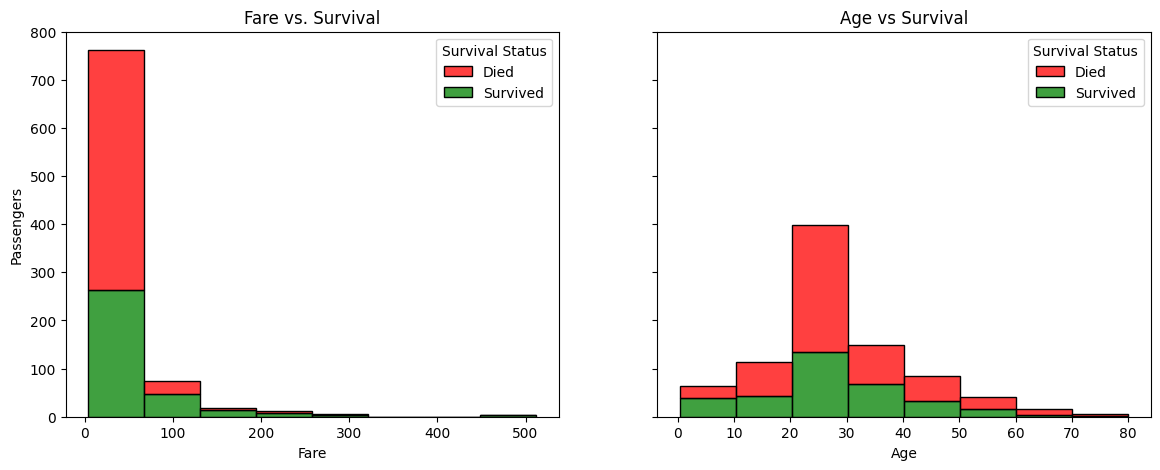

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Update the 'Survived' column to have string values for the legend
df_train['Survival Status'] = df_train['Survived'].map({0: 'Died', 1: 'Survived'})

# Define custom color palette
palette = {"Died": "red", "Survived": "green"}

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot Fare vs. Survival with the specified colors and fewer bins
sns.histplot(data=df_train, x="Fare", hue="Survival Status", multiple="stack", palette=palette, bins=8, ax=axes[0])
axes[0].set_title('Fare vs. Survival')
axes[0].set_ylabel('Passengers')  # Set y-axis label

# Plot Age vs. Survival with the specified colors and fewer bins
sns.histplot(data=df_train, x="Age", hue="Survival Status", multiple="stack", palette=palette, bins=8, ax=axes[1])
axes[1].set_title('Age vs Survival')
axes[1].set_ylabel('Passengers')  # Set y-axis label

plt.show()

### Lastly, let's use our best model to predict our test data

In [122]:
final_model = LogisticRegression(solver='liblinear',multi_class='auto',C=10)
final_model.fit(X_train, y_train)

LogisticRegression(C=10, solver='liblinear')

In [124]:
df_test.drop("Parch_6",axis=1,inplace=True)

In [125]:
final_model.predict(df_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,